<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_3_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.2_n250.csv',
 'data_multi_delta_-3.2_n120.csv',
 'data_multi_delta_-3.2_n60.csv',
 'data_multi_delta_-3.2_n30.csv',
 'data_multi_delta_-3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,26.795682,40.507578,66.124573,0.000162,143.427995,143.427210,0.000785
1,0.0,1.0,32.602690,97.980255,39.166040,-0.001209,179.747776,179.749139,-0.001363
2,0.0,2.0,97.674448,74.937194,73.411121,0.001057,256.023820,256.021262,0.002558
3,0.0,3.0,91.815340,77.431276,91.376147,-0.001894,270.620869,270.620503,0.000366
4,0.0,4.0,27.539363,60.141611,81.441273,-0.001433,179.120813,179.120841,-0.000027
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,44.285612,77.970388,32.698064,0.000665,164.954728,164.954748,-0.000020
29996,999.0,26.0,47.074481,95.300003,43.752572,0.000691,196.127746,196.128523,-0.000777
29997,999.0,27.0,29.463118,47.309018,93.619850,-0.001995,180.389992,180.390135,-0.000143
29998,999.0,28.0,84.820200,79.064936,97.886339,-0.000525,271.770950,271.770738,0.000211


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,26.795682,40.507578,66.124573,0.000162,143.427995,143.427210,0.000785
1,0.0,1.0,32.602690,97.980255,39.166040,-0.001209,179.747776,179.749139,-0.001363
2,0.0,2.0,97.674448,74.937194,73.411121,0.001057,256.023820,256.021262,0.002558
3,0.0,3.0,91.815340,77.431276,91.376147,-0.001894,270.620869,270.620503,0.000366
4,0.0,4.0,27.539363,60.141611,81.441273,-0.001433,179.120813,179.120841,-0.000027
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,44.285612,77.970388,32.698064,0.000665,164.954728,164.954748,-0.000020
29996,999.0,26.0,47.074481,95.300003,43.752572,0.000691,196.127746,196.128523,-0.000777
29997,999.0,27.0,29.463118,47.309018,93.619850,-0.001995,180.389992,180.390135,-0.000143
29998,999.0,28.0,84.820200,79.064936,97.886339,-0.000525,271.770950,271.770738,0.000211


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    26.795682  40.507578  66.124573  ...  143.427995  143.427210  0.000785
      1.0    32.602690  97.980255  39.166040  ...  179.747776  179.749139 -0.001363
      2.0    97.674448  74.937194  73.411121  ...  256.023820  256.021262  0.002558
      3.0    91.815340  77.431276  91.376147  ...  270.620869  270.620503  0.000366
      4.0    27.539363  60.141611  81.441273  ...  179.120813  179.120841 -0.000027
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   44.285612  77.970388  32.698064  ...  164.954728  164.954748 -0.000020
      26.0   47.074481  95.300003  43.752572  ...  196.127746  196.128523 -0.000777
      27.0   29.463118  47.309018  93.619850  ...  180.389992  180.390135 -0.000143
      28.0   84.820200  79.064936  97.886339  ...  271.770950  271.770738  0.000211
      29.0   40.798840  71.943140  71.766502  ...  194.507412  194.508249 -0.000836

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    26.795682  40.507578  66.124573  ...  143.427995  143.427210  0.000785
      1.0    32.602690  97.980255  39.166040  ...  179.747776  179.749139 -0.001363
      2.0    97.674448  74.937194  73.411121  ...  256.023820  256.021262  0.002558
      3.0    91.815340  77.431276  91.376147  ...  270.620869  270.620503  0.000366
      4.0    27.539363  60.141611  81.441273  ...  179.120813  179.120841 -0.000027
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   44.285612  77.970388  32.698064  ...  164.954728  164.954748 -0.000020
      26.0   47.074481  95.300003  43.752572  ...  196.127746  196.128523 -0.000777
      27.0   29.463118  47.309018  93.619850  ...  180.389992  180.390135 -0.000143
      28.0   84.820200  79.064936  97.886339  ...  271.770950  271.770738  0.000211
      29.0   40.798840  71.943140  71.766502  ...  194.507412  194.508249 -0.000836

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,26.795682,40.507578,66.124573,0.000162,143.427995,143.427210,0.000785
1,0.0,1.0,32.602690,97.980255,39.166040,-0.001209,179.747776,179.749139,-0.001363
2,0.0,2.0,97.674448,74.937194,73.411121,0.001057,256.023820,256.021262,0.002558
3,0.0,3.0,91.815340,77.431276,91.376147,-0.001894,270.620869,270.620503,0.000366
4,0.0,4.0,27.539363,60.141611,81.441273,-0.001433,179.120813,179.120841,-0.000027
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,44.285612,77.970388,32.698064,0.000665,164.954728,164.954748,-0.000020
29996,999.0,26.0,47.074481,95.300003,43.752572,0.000691,196.127746,196.128523,-0.000777
29997,999.0,27.0,29.463118,47.309018,93.619850,-0.001995,180.389992,180.390135,-0.000143
29998,999.0,28.0,84.820200,79.064936,97.886339,-0.000525,271.770950,271.770738,0.000211


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    26.795682  40.507578  66.124573  ...  143.427995  143.427210  0.000785
      1.0    32.602690  97.980255  39.166040  ...  179.747776  179.749139 -0.001363
      2.0    97.674448  74.937194  73.411121  ...  256.023820  256.021262  0.002558
      3.0    91.815340  77.431276  91.376147  ...  270.620869  270.620503  0.000366
      4.0    27.539363  60.141611  81.441273  ...  179.120813  179.120841 -0.000027
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   44.285612  77.970388  32.698064  ...  164.954728  164.954748 -0.000020
      26.0   47.074481  95.300003  43.752572  ...  196.127746  196.128523 -0.000777
      27.0   29.463118  47.309018  93.619850  ...  180.389992  180.390135 -0.000143
      28.0   84.820200  79.064936  97.886339  ...  271.770950  271.770738  0.000211
      29.0   40.798840  71.943140  71.766502  ...  194.507412  194.508249 -0.000836

[30000 rows x 7 columns]

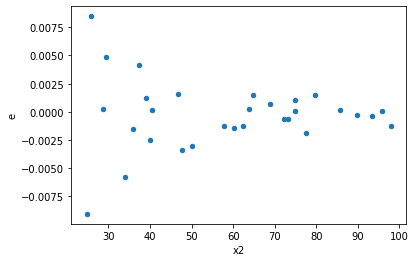

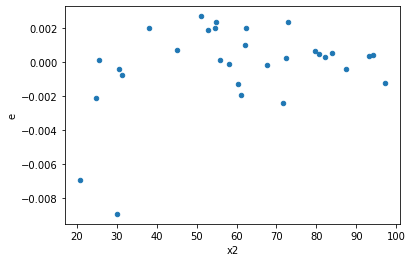

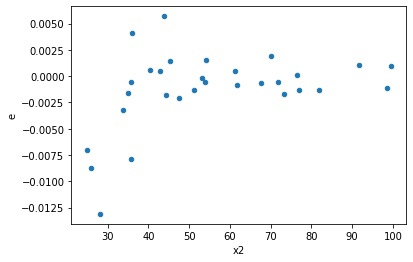

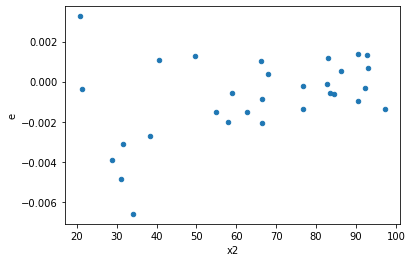

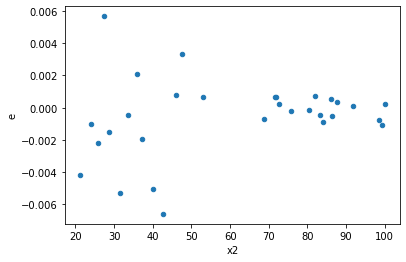

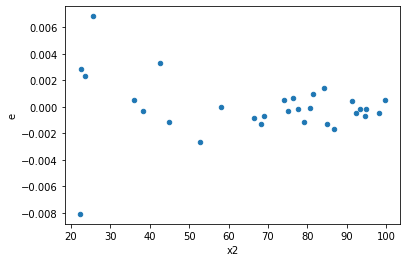

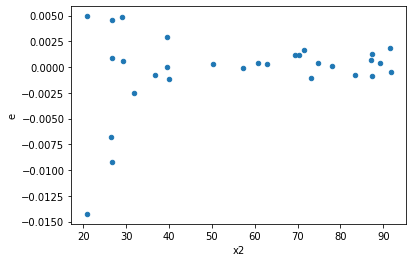

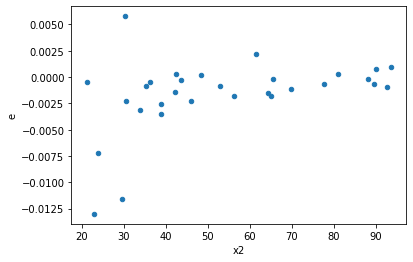

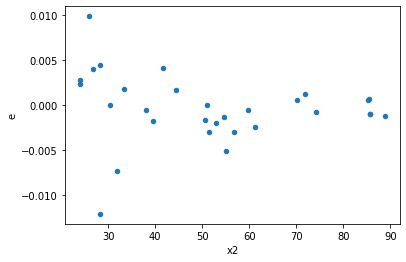

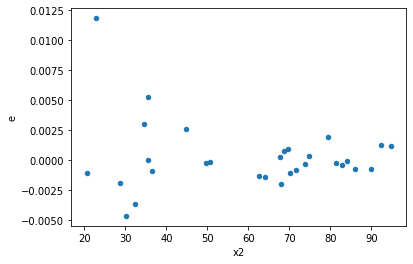

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
109.0,9.0,9.0,8.271915058618384e-06,1.2305629625535692e-05,9.191016731798204e-07,1.3672921806150768e-06,1.4876397470637277,0.5634909144802112,0.7182545427598944,0.2817454572401056,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,0.00021203798342573667,6.983430678245638e-06,2.3559775936192963e-05,7.759367420272931e-07,0.032934809911977336,2.2286207848619578e-05,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,7.261139855370619e-05,1.0569482031790624e-05,8.067933172634022e-06,1.1743868924211804e-06,0.14556229796308118,0.00839865727871661,Reject001=0 : Heteroscedasticity
2.0,9.0,9.0,0.00014342982073192755,1.286312858724419e-05,1.593664674799195e-05,1.429236509693799e-06,0.089682386282038,0.0013669695040246592,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,5.0248991889597296e-05,8.204557764365911e-06,5.583221321066367e-06,9.116175293739902e-07,0.16327805704823392,0.012598866197659335,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,7.918968897970416e-05,2.6480882122342424e-06,8.798854331078239e-06,2.942320235815825e-07,0.03343981074244315,2.378028595926264e-05,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,0.0001344080809892739,8.299807018528535e-06,1.4934231221030435e-05,9.222007798365038e-07,0.061750803652876184,0.0003082438143214192,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,0.00034691260576708184,1.0297693877426413e-05,3.854584508523132e-05,1.1441882086029348e-06,0.029683827298971992,1.4288200521815306e-05,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,0.0002260904147686474,1.3267473576568149e-05,2.512115719651638e-05,1.4741637307297942e-06,0.05868215859634924,0.00025031186873766955,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,0.00031085620383950976,2.2224237526312586e-05,3.4539578204389975e-05,2.469359725145843e-06,0.07149362712344842,0.0005574230405966928,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    884
Reject001=1 : Homoscedasticity      116
Name: Result_test, dtype: int64